In [1]:
import keras
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint   
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D,Flatten
from keras.datasets import cifar10
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import scipy
from scipy import misc
import os

/home/stephen/miniconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train[:400]
y_train=y_train[:400]
x_test=x_test[:100]
y_test=y_test[:100]
y_train = np.squeeze(y_train)
print('data loaded')
print(len(x_train))

data loaded
400


In [3]:
baseModel=InceptionV3(weights="imagenet",include_top=False,input_shape=(139,139,3))
baseModel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 139, 139, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 69, 69, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 69, 69, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 69, 69, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [4]:
big_x_train = np.array([scipy.misc.imresize(x_train[i], (139, 139, 3)) for i in range(0, len(x_train))]).astype('float32')
inception_input_train = preprocess_input(big_x_train)
# extract, process, and save bottleneck features
features = baseModel.predict(inception_input_train)
features = np.squeeze(features)
print('train data prepared')

/home/stephen/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


train data prepared


In [5]:
big_x_test = np.array([scipy.misc.imresize(x_test[i], (139, 139, 3)) for i in range(0, len(x_test))]).astype('float32')
inception_input_test = preprocess_input(big_x_test)
# extract, process, and save bottleneck features (test)
features_test = baseModel.predict(inception_input_test)
features_test = np.squeeze(features_test)
print('test data preparocessed')

/home/stephen/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


test data preparocessed


In [6]:
# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print("One hot encoding finished")

One hot encoding finished


In [16]:
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=2, input_shape=features.shape[1:],name='input'))
model.add(Dropout(0.4))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax',name="output"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Conv2D)               (None, 2, 2, 100)         819300    
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 100)         0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 100)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 820,310
Trainable params: 820,310
Non-trainable params: 0
_________________________________________________________________


In [17]:

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:

history=model.fit(features, y_train, batch_size=50, epochs=50, verbose=1,)

Epoch 1/50
400/400 [==============================] - 1s 3ms/step - loss: 12.0408 - acc: 0.1700
Epoch 2/50
400/400 [==============================] - 0s 1ms/step - loss: 12.4138 - acc: 0.2100
Epoch 3/50
400/400 [==============================] - 0s 1ms/step - loss: 12.5253 - acc: 0.2175
Epoch 4/50
400/400 [==============================] - 0s 1ms/step - loss: 11.5694 - acc: 0.2625
Epoch 5/50
400/400 [==============================] - 0s 1ms/step - loss: 10.3602 - acc: 0.3075
Epoch 6/50
400/400 [==============================] - 0s 1ms/step - loss: 7.9445 - acc: 0.4625A: 0s - loss: 8.1860 - acc: 0.45
Epoch 7/50
400/400 [==============================] - 0s 1ms/step - loss: 8.4719 - acc: 0.4000
Epoch 8/50
400/400 [==============================] - 0s 1ms/step - loss: 6.7985 - acc: 0.5175
Epoch 9/50
400/400 [==============================] - 0s 1ms/step - loss: 4.4920 - acc: 0.6525
Epoch 10/50
400/400 [==============================] - 1s 1ms/step - loss: 3.6623 - acc: 0.7000
Epoch 11/50


('Test loss:', 5.030001308917999)
('Test accuracy:', 0.63)


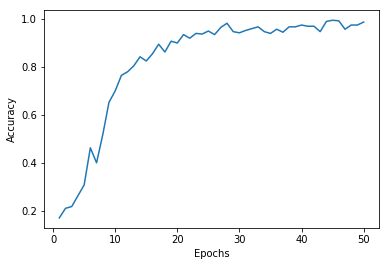

In [21]:
score = model.evaluate(features_test, y_test, verbose=0)
import matplotlib.pyplot as plt
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 50+1), history.history["acc"])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()